# Tasks

## Task 1: Source the Data Set

Import the Iris data set from the sklearn.datasets module.
Explain, in your own words, what the load_iris() function returns.

### Libraries

Resources:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html  

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [3]:
# First, import necessary libraries for importing data
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import datasets
import matplotlib.pyplot as plt 

In [4]:
#get the data from skilearn.
# source above provides instruction on loading it as a data frame.
iris = sk.datasets.load_iris(return_X_y=False, as_frame=True)


In [5]:
# take initial look at the data set

print(iris)
iris.keys()


{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns], 'target': 0      0
1      0
2 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

## Task 2:  Explore the Data Structure

Print and explain the shape of the data set, the first and last 5 rows of the data, the feature names, and the target classes.

Resources:

https://www.geeksforgeeks.org/python-basics-of-pandas-using-iris-dataset/ 

https://www.geeksforgeeks.org/get-last-n-records-of-a-pandas-dataframe/ 

In [6]:
# next check the shape of iris data. there are other parts of iris so have to specify data.
iris['data'].shape

(150, 4)

In [7]:
# The target.
iris['target']
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
# feature names
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
# return top 5 rows
iris['data'].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
iris['data'].tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [11]:
iris['data'].dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

## Task 3: Summarize the Data
For each feature calculate and display: mean, minimum, maximum, standard deviation, median

Resources: 

Jake VanderPlas. 2016. Python Data Science Handbook: Essential Tools for Working with Data (1st. ed.). O'Reilly Media, Inc.

https://www.geeksforgeeks.org/loop-or-iterate-over-all-or-certain-columns-of-a-dataframe-in-python-pandas/

In [12]:
#check exact column names first in case you need to reference them in code and so you know what to expect in output.
iris['data'].columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [13]:
# Describe the data set.
iris['data'].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
# now median - describe doesn't provide this so have made a for loop below.
#Iterate over column names
for column in iris['data'].columns:
    median_value = iris['data'][column].median()  # Get the min of the column
    print(f"Median value for {column}: {median_value}")  # Print result

Median value for sepal length (cm): 5.8
Median value for sepal width (cm): 3.0
Median value for petal length (cm): 4.35
Median value for petal width (cm): 1.3


## Task 4: Visualize Features
Plot histograms for each feature using matplotlib.
Add appropriate titles and axis labels.

Resources:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

https://www.geeksforgeeks.org/box-plot-and-histogram-exploration-on-iris-data/ 

In [ ]:
# put the columns into their own variables so i can do a histogram for each. give them short namesfor sake of writing code later.
data = iris['data']
sl = data['sepal length (cm)']
sw = data['sepal width (cm)']
pl = data['petal length (cm)']
pw = data['petal width (cm)']


Text(0, 0.5, 'Count')

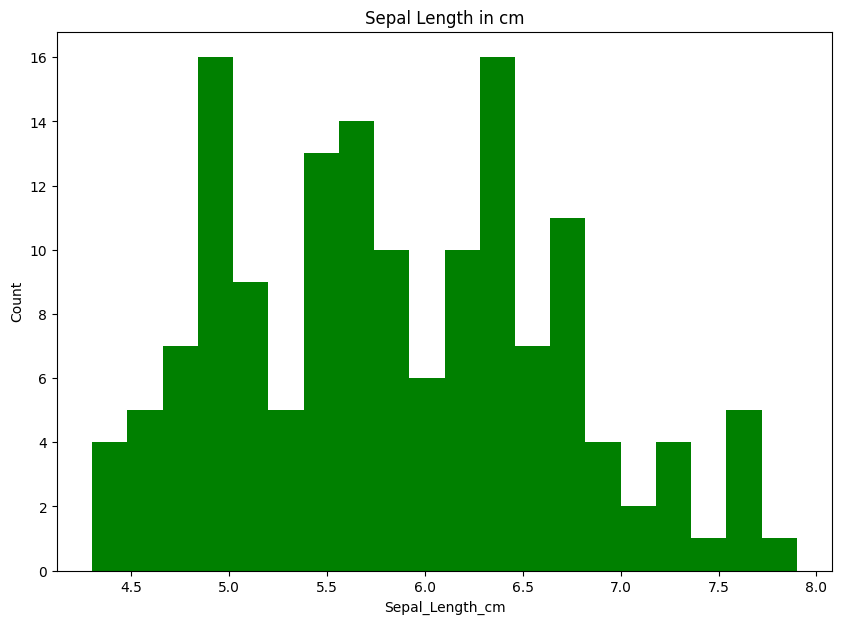

In [26]:
# histogram for sepal length(cm)
plt.figure(figsize = (10, 7))
plt.hist(sl, bins = 20, color = "green")
plt.title("Sepal Length in cm")
plt.xlabel("Sepal_Length_cm")
plt.ylabel("Count")

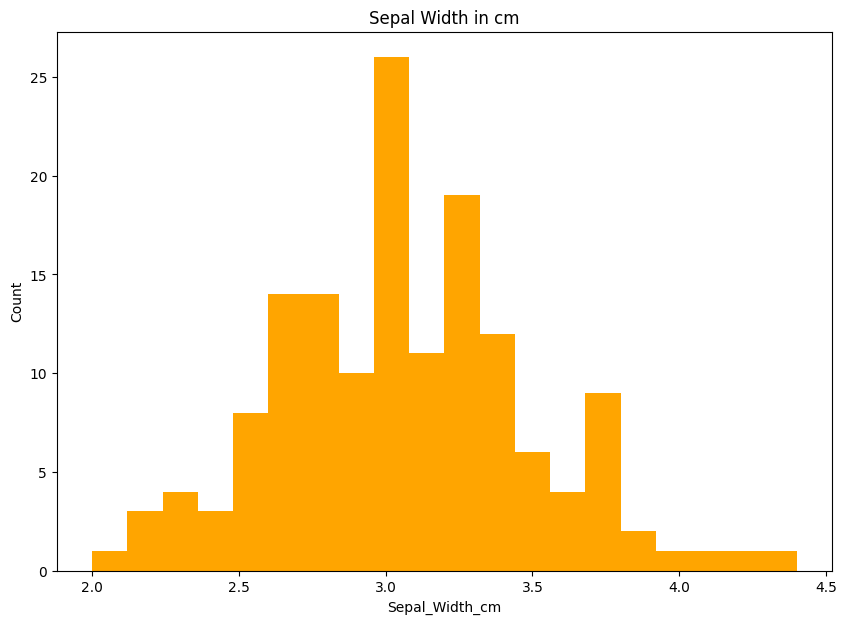

In [ ]:
# histogram for sepal width(cm)
plt.figure(figsize = (10, 7))
plt.hist(sw, bins = 20, color = "orange")
plt.title("Sepal Width in cm")
plt.xlabel("Sepal_Width_cm")
plt.ylabel("Count")

plt.show()

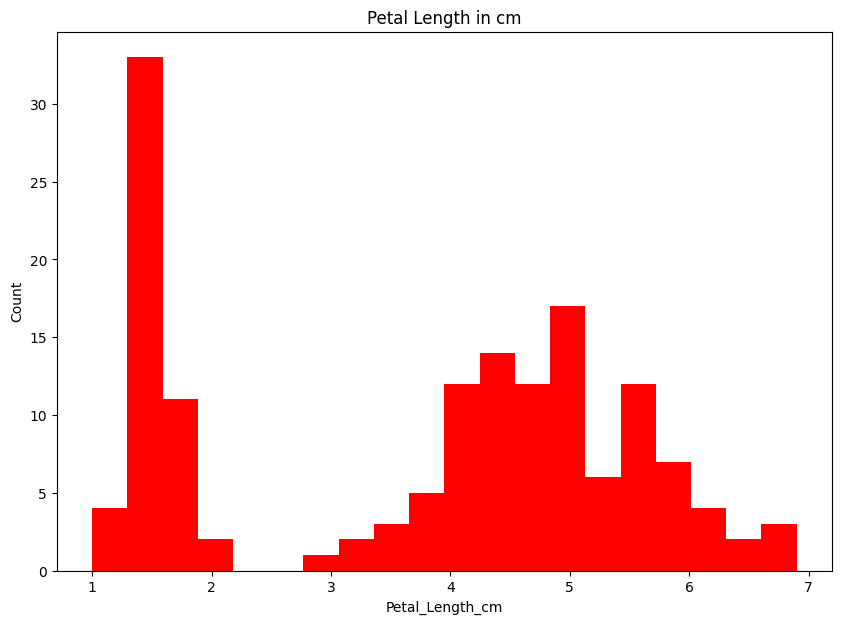

In [31]:
# histogram for petal length(cm)
plt.figure(figsize = (10, 7))
plt.hist(pl, bins = 20, color = "red")
plt.title("Petal Length in cm")
plt.xlabel("Petal_Length_cm")
plt.ylabel("Count")

plt.show()

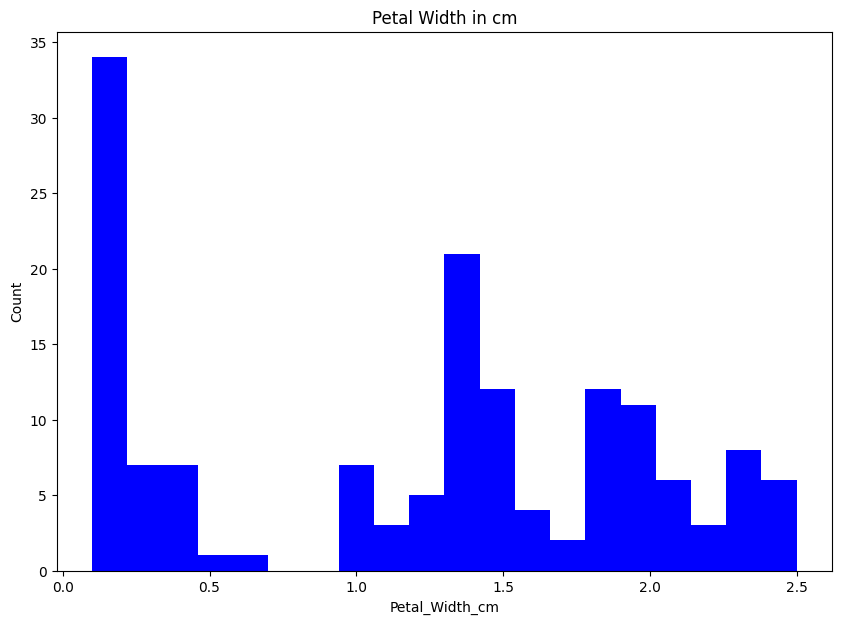

In [32]:
# histogram for petal width(cm)
plt.figure(figsize = (10, 7))
plt.hist(pw, bins = 20, color = "blue")
plt.title("Petal Width in cm")
plt.xlabel("Petal_Width_cm")
plt.ylabel("Count")

plt.show()

## Task 5: Investigate Relationships

## Task 6: Analyze Relationship

## Task 7: Analyze Class Distributions

## Task 8: Compute Correlations

## Task 9: Fit a Simple Linear Regression

## Task 10: Too Many Features

## END